# KNN for Linear Regression

In [1]:
import mglearn 
import matplotlib.pyplot as plt

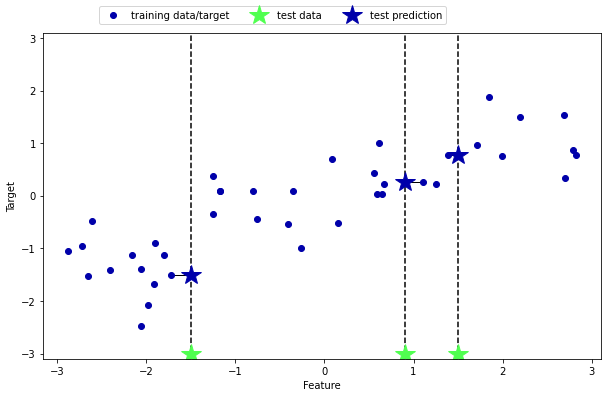

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

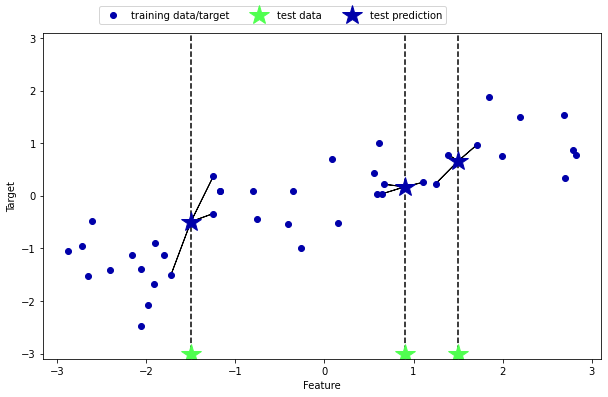

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(reg.score(X_test, y_test))

0.8344172446249605


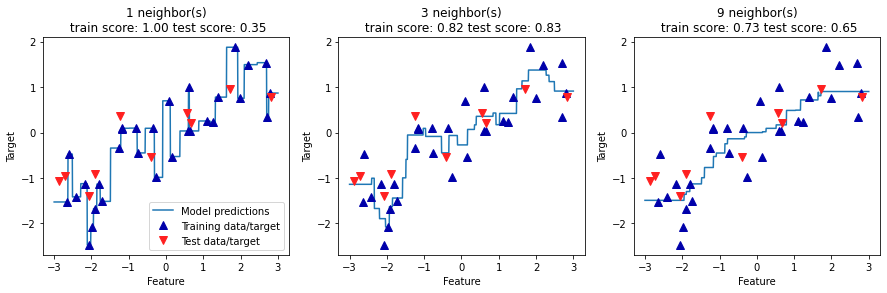

In [6]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Interesting parameters for KNR
<br>
1. weights : {'uniform', 'distance'}
2. metric : {'minkowski', 'euclidean', 'manhattan', 'chebyshev' ...}
3. p : int (minkowski distance power, default = 2)

For more information visit
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Try to implement yourself

Hints and subtasks
1. You can use the same dataset (X, y)
2. You will need distance function
3. You will need to find K closest points to the given one. You may start with the simple implementation of this algorithm.
3. In the same graphic draw train and test scores when changing K parameter (First try to imagine how should this look?).

In [14]:
from sklearn.neighbors import BallTree
import numpy as np
from sklearn.metrics import r2_score

In [15]:
class KnnRegressor:
    def __init__(self, n_neighbors=5, metric='minkowski', p=2):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p
        self.tree = None
        self.y_train = None
    
    def fit(self, x_train, y_train):
        self.tree = BallTree(x_train, metric=self.metric, p=self.p)
        self.y_train = y_train
    
    def predict(self, x_test):
        indices = self.tree.query(x_test, k = self.n_neighbors, return_distance = False)
        predictions = np.array([]) 
        for idx in np.arange(indices.shape[0]):
            predictions = np.append(predictions, self.y_train[indices][idx].mean())
        return predictions
    
    def score(self, x_test, y_test):
        predictions = self.predict(x_test)
        return r2_score(y_test, predictions)

Let's check if the class works correctly. We will use the same code that is in the cell[6] to plot the results. 

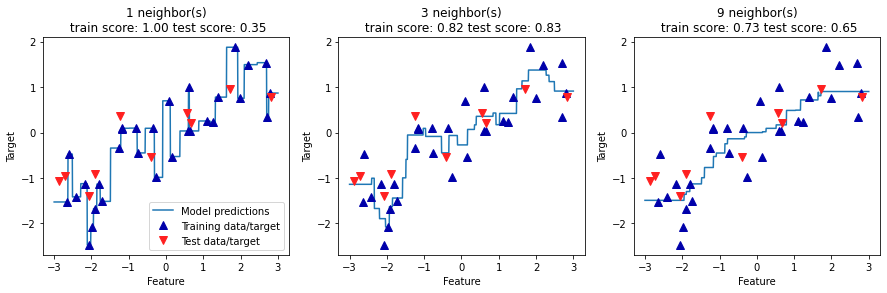

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KnnRegressor(n_neighbors=n_neighbors) #using the class written by me
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Results are identical, so our class works correctly (at least for this problem).

Let's look at more examples with different numbers of neighbors.

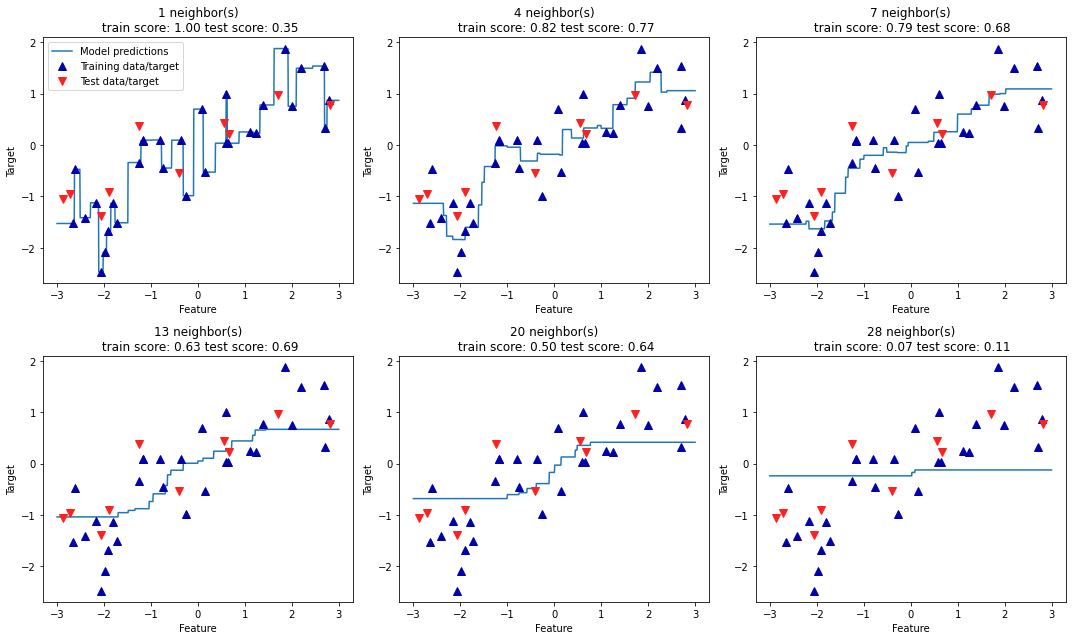

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 4, 7, 13, 20, 28], axes.flatten()):
    reg = KnnRegressor(n_neighbors=n_neighbors) #using the class written by me
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0,0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
    plt.tight_layout()

Let's see how train and test scores (R-squared) change for different values of K.

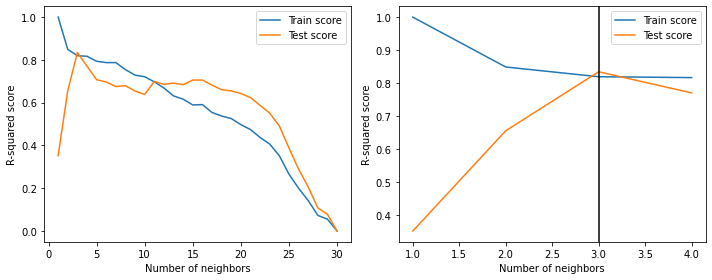

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

limit = X_train.shape[0]
train_score = []
test_score = []
k_range = range(1, limit+1)
for k in k_range:
    reg = KnnRegressor(n_neighbors = k) #our class
    reg.fit(X_train, y_train)
    train_score.append(reg.score(X_train, y_train))
    test_score.append(reg.score(X_test, y_test))

ax[0].plot(k_range, train_score, label='Train score')
ax[0].plot(k_range, test_score, label='Test score')
ax[0].set_xlabel('Number of neighbors')
ax[0].set_ylabel('R-squared score')
ax[0].legend();

ax[1].plot(k_range[:4], train_score[:4], label='Train score')
ax[1].plot(k_range[:4], test_score[:4], label='Test score')
ax[1].set_xlabel('Number of neighbors')
ax[1].set_ylabel('R-squared score')
ax[1].legend();
ax[1].axvline(x=3, color='black')
plt.tight_layout()

The plots above are made by using our KnnRegressor class. To make sure that everything is correct, let's draw them using the original KNeighborsRegressor class.

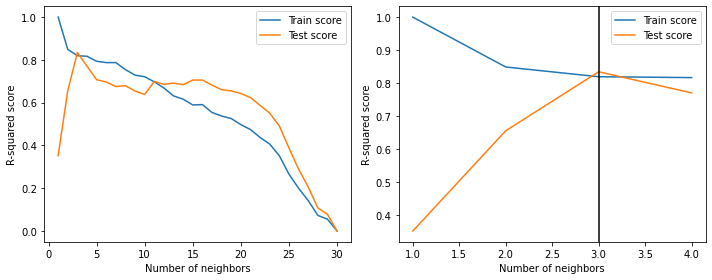

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

limit = X_train.shape[0]
train_score = []
test_score = []
k_range = range(1, limit+1)
for k in k_range:
    reg = KNeighborsRegressor(n_neighbors = k) #sklearn 
    reg.fit(X_train, y_train)
    train_score.append(reg.score(X_train, y_train))
    test_score.append(reg.score(X_test, y_test))

ax[0].plot(k_range, train_score, label='Train score')
ax[0].plot(k_range, test_score, label='Test score')
ax[0].set_xlabel('Number of neighbors')
ax[0].set_ylabel('R-squared score')
ax[0].legend();

ax[1].plot(k_range[:4], train_score[:4], label='Train score')
ax[1].plot(k_range[:4], test_score[:4], label='Test score')
ax[1].set_xlabel('Number of neighbors')
ax[1].set_ylabel('R-squared score')
ax[1].legend();
ax[1].axvline(x=3, color='black')
plt.tight_layout()

Everything is correct.

As we can see when the number of neighbors is very small (for example when k=1), we have an overfitting problem (high variance), on the training set model is ideal (k=1, R2=1), but on the test set it is working very badly (k=1, R2<0.4). 
The score on the training set is almost always decreasing, whereas on the test set it increases, then decreases, then increases again and then starts to decrease.    
For big values of the number of neighbors we have an underfitting problem which gets worse as the k increases. If we use k=30, that will mean that we are using the whole training set as neighbors, so for any point from the test set we will get the same result which will be the mean of all points from y_train, so our regression line will be a constant line (it will have high bias).  
From the left plot we can see that there is a point between 3 and 5 that will be the best choise for the number of neighbors (for this problem). It's a point where the score is high enough (>0.8) and after that point R2 starts to decrease both on training and test sets. Actually it is the global maximum point for the score on the test set which is good. From the right plot we can see that that point is k=3. That's our best choice for k. 